In [5]:
import numpy as np
import pandas as pd 
import os 

path_to_raw = '/Users/daniellee/Desktop/Data/Datasets/toxic_comment/'
data = pd.read_csv(path_to_raw + 'train.csv')

In [40]:
pd.set_option('display.max_colwidth', -1)

In [42]:
data['comment_text'] = data['comment_text'].str.replace('\n', ' ')

In [15]:
# Count of hate comments by types
data.iloc[:,2:].sum()

toxic            9237
severe_toxic      965
obscene          5109
threat            305
insult           4765
identity_hate     814
dtype: int64

In [28]:
# Total number of hate comments 
data['flagged'] = data.iloc[:,2:8].apply(lambda x: sum(x), axis=1)

In [32]:
data[data['flagged'] >= 1].shape

(9790, 9)

In [33]:
# Proportion
9790 / data.shape[0]

0.10213769287748693

In [43]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,flagged
0,22256635,"Nonsense? kiss off, geek. what I said is true. I'll have your account terminated.",1,0,0,0,0,0,1
1,27450690,""" Please do not vandalize pages, as you did with this edit to W. S. Merwin. If you continue to do so, you will be blocked from editing. """,0,0,0,0,0,0,0
2,54037174,""" """"Points of interest"""" I removed the """"points of interest"""" section you added because it seemed kind of spammy. I know you probably didn't mean to disobey the rules, but generally, a point of interest tends to be rather touristy, and quite irrelevant to an area culture. That's just my opinion, though. If you want to reply, just put your reply here and add {{talkback|Jamiegraham08}} on my talkpage. """,0,0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offence. Wow wasn't aware of it. Blocking me has shown your support towards your community. Thanku for that,0,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ethereal vocal style and dark lyrical content. The cited sources in the External Links are saying those things. If you feel the sources are unreliable or I did not represent what they said correctly rewrite or delete it.,0,0,0,0,0,0,0


In [47]:
data[data.flagged == 0]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,flagged
1,27450690,""" Please do not vandalize pages, as you did with this edit to W. S. Merwin. If you continue to do so, you will be blocked from editing. """,0,0,0,0,0,0,0
2,54037174,""" """"Points of interest"""" I removed the """"points of interest"""" section you added because it seemed kind of spammy. I know you probably didn't mean to disobey the rules, but generally, a point of interest tends to be rather touristy, and quite irrelevant to an area culture. That's just my opinion, though. If you want to reply, just put your reply here and add {{talkback|Jamiegraham08}} on my talkpage. """,0,0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offence. Wow wasn't aware of it. Blocking me has shown your support towards your community. Thanku for that,0,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ethereal vocal style and dark lyrical content. The cited sources in the External Links are saying those things. If you feel the sources are unreliable or I did not represent what they said correctly rewrite or delete it.,0,0,0,0,0,0,0
5,82428052,Fried chickens Is dat sum fried chickens?,0,0,0,0,0,0,0
6,87311443,Why can you put English for example on some players but others people don't like it - why?,0,0,0,0,0,0,0
7,114749757,"Guy Fawkes im a resident in bridgwater and i go to the carnival every year, im wuite dedicated to the town and enjoy alot about it, However, i think you are wrong, although we are rebels i think that the carnvial is to celebrate Guy fawkes getting caught and therfor preventing it, why would you want to celebrate somebody theying to murder out majisty.",0,0,0,0,0,0,0
8,138560519,"as far as nicknames go this article is embarrassing, Where is the Human fish, golden fish, flying fish, and the American super fish, among others? wiki should be ashamed for this mess of an article. ~Anonymous *and there I signed the post*",0,0,0,0,0,0,0
9,139353149,Woodland Meadows Good to hear that you corrected that.,0,0,0,0,0,0,0
10,150009866,""" Well I just finished a good bit of editing. I haven't had a chance to go through and do all the tagging and referencing yet since work calls but I am extremely confident in the scientific factual basis of everything stated in here. The referencing can pretty much be all made to the book """"Particle Imaging Velocimetry A practical guide"""" by Raffel, Willert, Wereley and Kompenhans if someone can add it. Also, not sure how to exactly do that as it all can be found in numerous scientific journals, databases, etc. but is so conveniently placed all in that one book. The only thing I am unsure about as I have no experience with is Molecular Tagging Velocimetry. To put it simply, I would like to keep technique defects in the summaries but I don't know what this one's is. To put is bluntly, the description as it is now is too good to be true. I know it has defects and problems, I don't know what they are. The fact is the technique was developed in 97ish and is not in widespread use. If the description were accurate, everyone would use it. I have met or heard of not one person using it, which means there is some big flaw in the technique that if someone can find, be my guest to add it. Everything else, please post on discussion page before editing critical information as I am positive what I have said can be completely defended but am open to solid arguments. I won't be pigheaded about it. Also, anyone with knowledge of tomographic PIV please expand the section. It is a volumetric analysis technique that I know of and know its new, but know nothing about.""",0,0,0,0,0,0,0


In [48]:
data['length'] = data['comment_text'].str.len()

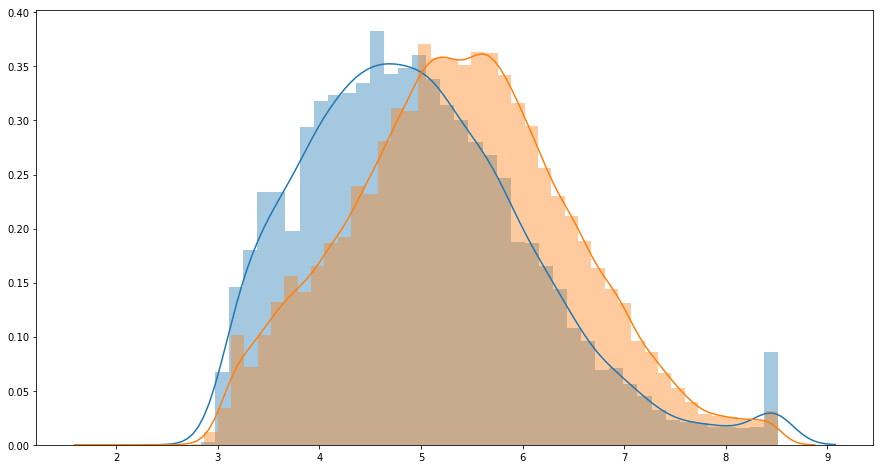

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

toxic_length = data.loc[data['flagged'] > 0, ['length']].apply(lambda x: np.log(x+1))
normal_length = data.loc[data['flagged'] == 0, ['length']].apply(lambda x: np.log(x+1))

f, ax = plt.subplots(figsize=(15,8))
sns.distplot(toxic_length)
sns.distplot(normal_length)

In [63]:
toxic_length.describe().T

,count,mean,std,min,25%,50%,75%,max
length,9790.0,4.970282,1.112699,2.833213,4.143135,4.867534,5.652489,8.517393


In [64]:
normal_length.describe().T

,count,mean,std,min,25%,50%,75%,max
length,86061.0,5.392754,1.092214,1.94591,4.634729,5.379897,6.115892,8.517393
